# 1.1 Install Dependencies and Setup

In [181]:
!pip3 install tensorflow opencv-python matplotlib

In [182]:
! pip list

Package                       Version
----------------------------- ------------
absl-py                       2.1.0
aext_assistant                0.4.0
aext_assistant_server         0.4.0
aext_core                     0.4.0
aext_core_server              0.4.0
aext_shared                   0.4.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-b

In [183]:
import tensorflow as tf
import os

In [184]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [185]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [186]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True) #limit the momory need

# 1.2 Remove Dodgy Images

In [187]:
#this block helps to get rid of all the images with incorrect extensions,corrupted,etc
import cv2
import imghdr # helps in checking the image extension
from matplotlib import pyplot as plt

In [188]:
data_dir = 'data'

In [189]:
# files = os.listdir(data_dir)

# # Check if there are files in the directory
# if files:
#     # Remove the second file in the list (index 1)
#     file_to_remove = os.path.join(data_dir, files[1])
#     os.remove(file_to_remove)
#     print(f"File '{file_to_remove}' removed successfully.")
# else:
#     print("No files in the directory.")

In [190]:
os.listdir(os.path.join(data_dir,'with')) #prints all the images in the happy folder

['media21-prostate-mri-cspca-cad.png',
 'newseventsimage_1522858668909_mainnews2012_x1.jpg',
 '455990acb9342c7983c76a5802f2d3bb.jpg',
 '18774tn.jpg',
 'ProstateCaCR1-1024x289.jpg',
 'images33.jpg',
 'image18.jpeg',
 '1273-10-7331-1-17-20170329.jpg',
 'WhatToExpectDuringMRIScreeningforCancer.jpg',
 '13244_2023_1428_Fig4_HTML.jpg',
 'fonc-12-775387-g001.jpg',
 'rp_200713_prostate_adenocarcinoma_anterior_tumor_mri_800x450.jpg',
 'image14.jpeg',
 'Prostate-gland.jpg',
 'cancers-15-05825-g001-550.jpg',
 'AUA2018ProstateCancerMRIDiagnosisandManagementStudies.jpg',
 'images21.jpg',
 'images35.jpg',
 '41391_2004_Article_BF4500767_Fig1_HTML.jpg',
 'csPCaX.x20.jpeg',
 '2014_08_14_mri_guided_prostate_biopsy.jpg',
 'prostate-cancer.jpg',
 'fonc-09-01264-g001.jpg',
 '-1-tz-prostateca.jpg',
 'images22.jpg',
 's.com2Fbcp2Fimages2FdmImage2FSourceImage2Fnovel-metabolic-imaging-1920x10802.jpg',
 'psma-petmri-accurately.jpg',
 'Figure_for20Frederick.jpg',
 'Role-of-MRI-in-staging-locally-advanced-prostat

In [191]:
image_exts = ['jpeg','jpg','bmp','png']

In [192]:
img = cv2.imread(os.path.join('data','with','_93652075_m8650208-prostate_cancer_mri_scan-spl.jpg')) 


In [193]:
img #its a numpy array

array([[[ 25,  55,  80],
        [ 26,  57,  82],
        [ 31,  63,  86],
        ...,
        [ 95, 142, 163],
        [105, 155, 175],
        [117, 167, 185]],

       [[ 18,  47,  74],
        [ 18,  49,  74],
        [ 17,  51,  75],
        ...,
        [ 92, 139, 160],
        [103, 153, 173],
        [115, 165, 183]],

       [[ 16,  46,  75],
        [ 15,  45,  72],
        [ 12,  45,  71],
        ...,
        [ 89, 136, 157],
        [100, 150, 170],
        [113, 163, 181]],

       ...,

       [[ 35,  68,  83],
        [ 34,  67,  82],
        [ 34,  68,  84],
        ...,
        [122, 182, 206],
        [115, 175, 204],
        [112, 172, 202]],

       [[ 30,  63,  78],
        [ 27,  60,  75],
        [ 25,  59,  75],
        ...,
        [122, 182, 206],
        [111, 171, 200],
        [106, 166, 196]],

       [[ 29,  63,  76],
        [ 25,  59,  72],
        [ 21,  56,  70],
        ...,
        [123, 183, 207],
        [111, 171, 200],
        [104, 164, 194]]

In [194]:
img.shape # 3 shows colored image

(549, 976, 3)

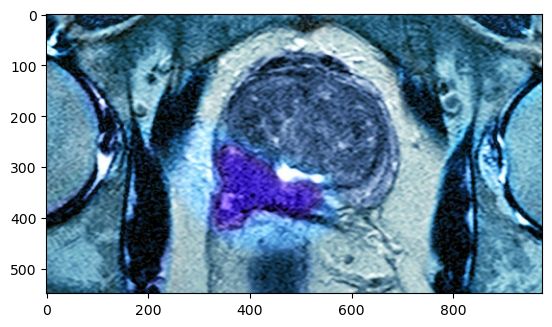

In [195]:
plt.imshow(img)

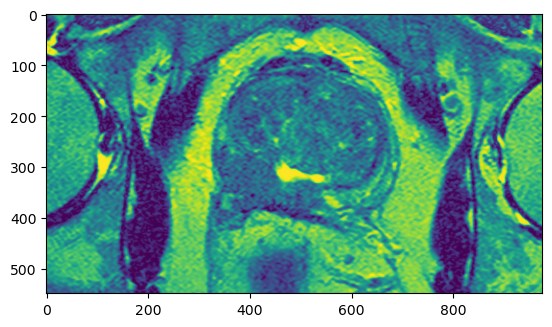

In [196]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)) #this statement fix the color
plt.show()

In [197]:
files = os.listdir(data_dir)
# if files:
#     # Remove the second file in the list (index 1)
#     file_to_remove = os.path.join(data_dir, files[0])
#     os.remove(file_to_remove)
#     print(f"File '{file_to_remove}' removed successfully.")
# else:
#     print("No files in the directory.")

In [198]:
files

['with', 'without']

In [199]:
os.listdir(data_dir)

['with', 'without']

In [200]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("image not in ext list{}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


# 1.3 Load Data

In [201]:
tf.data.Dataset #tensorflow has a dataset api-> this allows you to do datapipeline which allows u to scale on much larger datasets but it also gives u a repeatable set of data that u are going to apply on your data

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [202]:
#tf.data.Dataset.list_files #helps in wildcard search

In [203]:
import numpy as np

In [204]:
# tf.keras.utils.image_dataset_from_directory??

In [205]:
data = tf.keras.utils.image_dataset_from_directory('data') #keras have a data pipeline direct function or helper built into it

Found 224 files belonging to 2 classes.


In [206]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [207]:
data_iterator = data.as_numpy_iterator()

In [208]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x322099310>)

In [209]:
batch = data_iterator.next()

2024-05-06 12:02:00.135495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:00.188869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:00.302741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:00.326776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


In [210]:
batch

2024-05-06 12:02:00.356805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          ...,
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ]],
 
         [[254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          ...,
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ]],
 
         [[254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          ...,
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.  

2024-05-06 12:02:00.403176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


In [211]:
type(batch)

tuple

In [212]:
len(batch)

2

In [213]:
#images represented as numpy array
batch[0].shape #return (batchSize,image_size,tells pic is colored or not) imageSize = (256,256)

(32, 256, 256, 3)

In [214]:
batch[1]  #here 1 represent either happy or sad //ly 0 will do

2024-05-06 12:02:00.422758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int32)

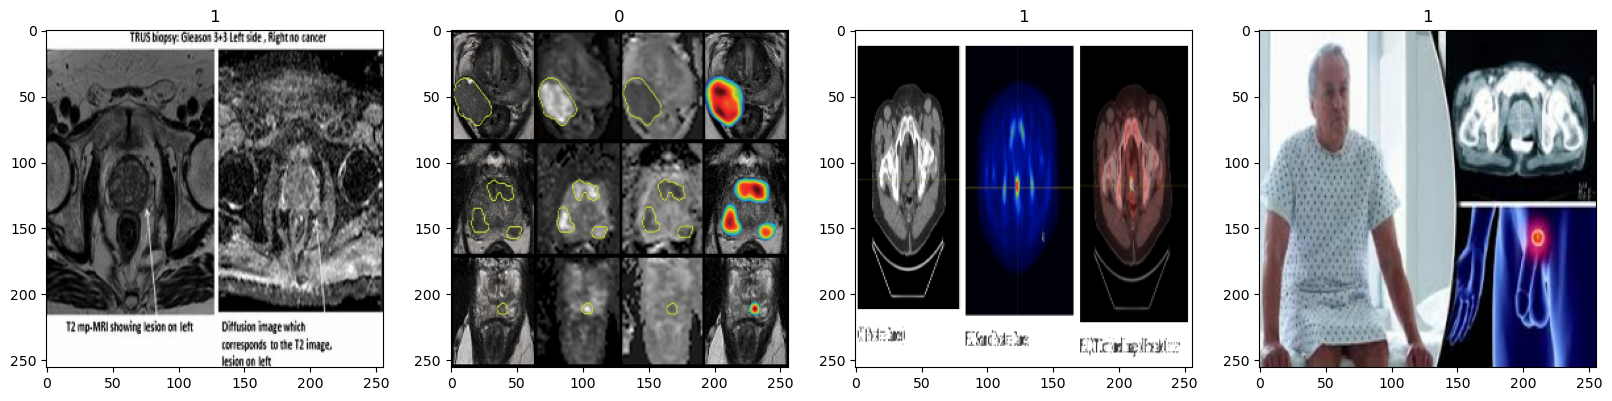

In [215]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
    ax[idx]. imshow(img.astype(int))
    ax[idx]. title.set_text(batch[1][idx])
    
    # this tells that 1 represents without and 0 represents with

In [216]:
print(batch[0].min())
print(batch[0].max())
# in preprocessing we will reduce the range from 0 to 255 -> 0 to 1(in deep learing model its good for data to be as small as possible)

0.0
255.0


In [217]:
scaled = batch[0]/255

In [218]:
print(scaled.min())
print(scaled.max())

0.0
1.0


# 2 Preprocess Data

## 2.1 Scale data

In [219]:
# scaling data using capability of data pipelining -> this a transformation step on data pipeline
data = data.map(lambda x,y: (x/255,y)) #here x-> images (scaling done from 0-255 to 0-1) and y has no transformation

In [220]:
scaled_iterator = data.as_numpy_iterator()

In [221]:
batch = scaled_iterator.next()

2024-05-06 12:02:00.925409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:00.938047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:00.965062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


2024-05-06 12:02:00.988363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:00.996628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:01.036273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:01.044450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


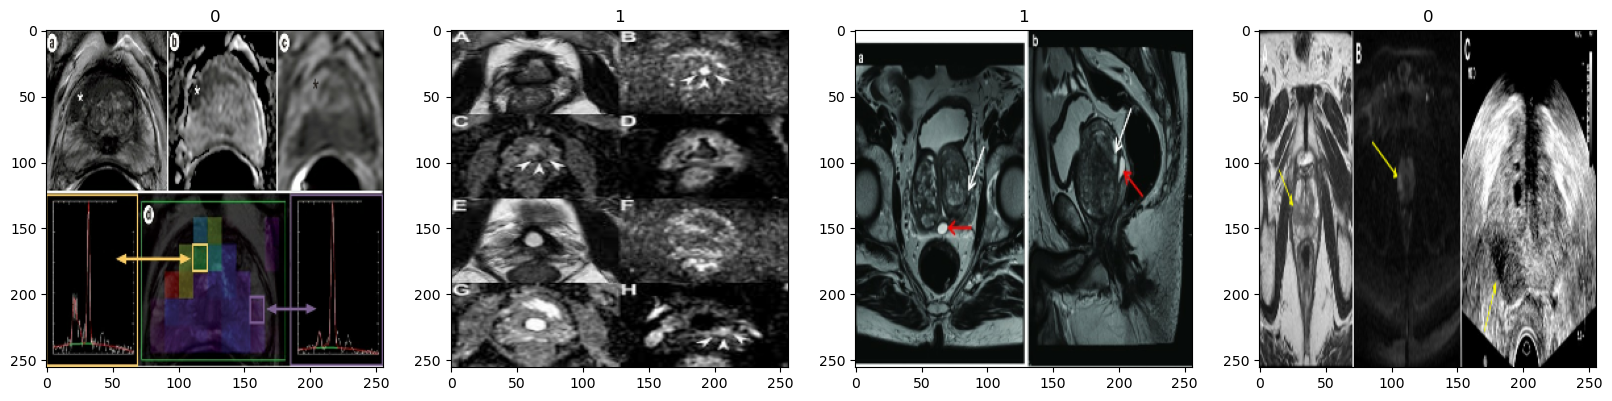

In [222]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
    ax[idx]. imshow(img)
    ax[idx]. title.set_text(batch[1][idx])

## 2.2 Split data

In [223]:
len(data)

7

In [224]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [225]:
train_size+val_size+test_size

7

In [226]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [227]:
len(train)

4

In [228]:
len(val)

2

In [229]:
len(test)

1

# Deep Model

## 3.1 Building deep learning model

In [230]:
# model building api in keras and tensorflow is -> sequential(great for one data input and one data output),functional api(multiple inputs and multiple outputs)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [231]:
model = Sequential()

In [232]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add (MaxPooling2D())

model.add(Flatten ())
model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [233]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [234]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Train

In [235]:
logdir = 'logs2'

In [236]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [237]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20


2024-05-06 12:02:01.972602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:02.006002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:02.008771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:02.044662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:02.052047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:02.061405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:02.205103: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.3893 - loss: 3.1440

2024-05-06 12:02:03.540111: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:03.613031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:03.686907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:03.737080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:03.738515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 431ms/step - accuracy: 0.4021 - loss: 3.1231 - val_accuracy: 0.5312 - val_loss: 0.7561
Epoch 2/20


2024-05-06 12:02:03.767760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:03.773595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:03.933659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:04.015834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:04.022664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:04.028746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:04.056767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:04.109555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known inc

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.5990 - loss: 0.6879

2024-05-06 12:02:05.215073: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:05.229196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:05.327696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:05.368073: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 372ms/step - accuracy: 0.5885 - loss: 0.6906 - val_accuracy: 0.5156 - val_loss: 0.6973
Epoch 3/20


2024-05-06 12:02:05.443690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:05.477333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:05.539137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:05.656256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:05.661824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:05.795282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:05.797245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:05.839059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS il

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.4935 - loss: 0.6965

2024-05-06 12:02:06.880960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:06.903695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:06.922856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:06.973096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:06.980066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:06.999812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:07.101871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 378ms/step - accuracy: 0.4948 - loss: 0.6961 - val_accuracy: 0.5312 - val_loss: 0.6880
Epoch 4/20


2024-05-06 12:02:07.354376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:07.371512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:07.447739: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:07.544759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:07.557138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:07.640859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:07.647160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.5638 - loss: 0.6878

2024-05-06 12:02:08.557836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:08.588586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:08.682896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:08.798591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:08.808445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:08.847256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:08.897651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step - accuracy: 0.5635 - loss: 0.6878 - val_accuracy: 0.7969 - val_loss: 0.6817
Epoch 5/20


2024-05-06 12:02:09.110565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:09.154738: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:09.162973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:09.209892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:09.260945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:09.315423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:09.472123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.6868 - loss: 0.6829

2024-05-06 12:02:10.484584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:10.505851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:10.508098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:10.529442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:10.608017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:10.667005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 393ms/step - accuracy: 0.6729 - loss: 0.6832 - val_accuracy: 0.7969 - val_loss: 0.6733
Epoch 6/20


2024-05-06 12:02:10.699695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:10.925732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:10.968571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:11.035519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:11.052434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:11.061025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:11.097184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:11.100445: W tensorflow/core/lib/pn

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.7259 - loss: 0.6781

2024-05-06 12:02:12.061375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:12.069138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:12.223804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:12.270281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:12.291358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:12.338881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:12.362041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 370ms/step - accuracy: 0.7010 - loss: 0.6787 - val_accuracy: 0.4375 - val_loss: 0.7003
Epoch 7/20


2024-05-06 12:02:12.486285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:12.541876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:12.545066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:12.592302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:12.597851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:12.807033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:12.818178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.4629 - loss: 0.6902

2024-05-06 12:02:13.728449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:13.732977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:13.804031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:13.829888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:13.835471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:13.914548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 376ms/step - accuracy: 0.4750 - loss: 0.6866 - val_accuracy: 0.5781 - val_loss: 0.6644
Epoch 8/20


2024-05-06 12:02:13.979210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:14.153500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:14.178317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:14.206744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:14.227512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:14.261651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:14.280171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step - accuracy: 0.4375 - loss: 0.6737

2024-05-06 12:02:14.564403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.5911 - loss: 0.6632

2024-05-06 12:02:15.371644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:15.379390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:15.398049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:15.425030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:15.428316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:15.504773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:15.542597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 426ms/step - accuracy: 0.6073 - loss: 0.6623 - val_accuracy: 0.7969 - val_loss: 0.6320
Epoch 9/20


2024-05-06 12:02:15.971744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:15.991028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:16.013074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:16.058963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:16.097571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:16.243246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:16.259712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.7240 - loss: 0.6303

2024-05-06 12:02:17.283671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:17.291958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:17.304326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:17.339744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step - accuracy: 0.7229 - loss: 0.6305 - val_accuracy: 0.8125 - val_loss: 0.5936
Epoch 10/20


2024-05-06 12:02:17.513414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:17.521560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:17.528537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:17.695189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:17.765243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:17.813816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:17.883063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:17.968822: W tensorflow/core/lib/png/png_io.cc:89] PNG 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.7109 - loss: 0.6003

2024-05-06 12:02:18.926468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:18.930852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:18.969160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:19.006589: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:19.017956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:19.056125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:19.067029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step - accuracy: 0.7125 - loss: 0.5997 - val_accuracy: 0.8281 - val_loss: 0.5662
Epoch 11/20


2024-05-06 12:02:19.333365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:19.415916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:19.434810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:19.473338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:19.538447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:19.610494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:19.636622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.7448 - loss: 0.5687

2024-05-06 12:02:20.594482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:20.605866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:20.606000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:20.641335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:20.681292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:20.747699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:20.803300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - accuracy: 0.7427 - loss: 0.5671 - val_accuracy: 0.7969 - val_loss: 0.5271
Epoch 12/20


2024-05-06 12:02:21.061487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:21.074681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:21.079663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:21.184696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:21.193649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:21.201236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:21.266894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.7812 - loss: 0.4693

2024-05-06 12:02:22.284112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:22.333322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:22.398742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:22.448758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:22.457441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:22.469239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:22.484620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step - accuracy: 0.7719 - loss: 0.4750 - val_accuracy: 0.8281 - val_loss: 0.4423
Epoch 13/20


2024-05-06 12:02:22.805890: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:22.843634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:22.893138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:23.004123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:23.075618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:23.098150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:23.139976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.7357 - loss: 0.5111

2024-05-06 12:02:24.190391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:24.255817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:24.353825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:24.387354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:24.391023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:24.415868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:24.424949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 403ms/step - accuracy: 0.7323 - loss: 0.5158 - val_accuracy: 0.8125 - val_loss: 0.4371
Epoch 14/20


2024-05-06 12:02:24.663918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:24.698960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:24.780873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:24.834260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:24.868934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step - accuracy: 0.8125 - loss: 0.4490

2024-05-06 12:02:25.045307: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:25.055955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.8118 - loss: 0.4507

2024-05-06 12:02:25.991154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:26.003972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:26.038579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:26.077430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:26.154446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:26.204245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:26.263259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 408ms/step - accuracy: 0.8104 - loss: 0.4527 - val_accuracy: 0.7969 - val_loss: 0.4408
Epoch 15/20


2024-05-06 12:02:26.431988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:26.460138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:26.469965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:26.548775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:26.712720: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:26.727532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:26.817360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.7220 - loss: 0.4939

2024-05-06 12:02:27.628998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:27.650509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:27.729449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:27.734301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:27.744966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:27.784206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:27.832101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 368ms/step - accuracy: 0.7323 - loss: 0.4861 - val_accuracy: 0.7812 - val_loss: 0.4099
Epoch 16/20


2024-05-06 12:02:28.056797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:28.092957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:28.134584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:28.145750: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:28.190804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:28.310237: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:28.470909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.8379 - loss: 0.4157

2024-05-06 12:02:29.303156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:29.320317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:29.355451: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:29.379885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:29.471652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:29.477308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:29.488421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 368ms/step - accuracy: 0.8438 - loss: 0.4097 - val_accuracy: 0.7500 - val_loss: 0.4497
Epoch 17/20


2024-05-06 12:02:29.686493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:30.202957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:30.298100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:30.376816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:30.415781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:30.448377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:30.476290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.8327 - loss: 0.3731

2024-05-06 12:02:31.432039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:31.465214: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:31.525518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:31.556372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:31.565287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:31.614957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - accuracy: 0.8302 - loss: 0.3719 - val_accuracy: 0.7969 - val_loss: 0.3685
Epoch 18/20


2024-05-06 12:02:31.680629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:32.056241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:32.078812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:32.106672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:32.107506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:32.134361: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:32.187575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:32.188418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not p

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.7721 - loss: 0.4056

2024-05-06 12:02:33.216415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:33.229175: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:33.256508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:33.270739: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:33.343464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:33.383582: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step - accuracy: 0.7771 - loss: 0.3999 - val_accuracy: 0.9062 - val_loss: 0.2761
Epoch 19/20


2024-05-06 12:02:33.454804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:33.661146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:33.675888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:33.680290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:33.867784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:33.928612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:33.937780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:33.971718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile '

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.8607 - loss: 0.2904

2024-05-06 12:02:34.902211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:34.947479: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:34.950280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:35.021310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:35.039530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:35.105037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 374ms/step - accuracy: 0.8604 - loss: 0.2925 - val_accuracy: 0.8750 - val_loss: 0.3121
Epoch 20/20


2024-05-06 12:02:35.176106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:35.328298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:35.362128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:35.367163: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:35.497092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:35.527005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:35.545473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:35.664240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known inc

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.8743 - loss: 0.3287

2024-05-06 12:02:36.577993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:36.608798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:36.632302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:36.675229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:36.684359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:36.707004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:36.781823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 412ms/step - accuracy: 0.8729 - loss: 0.3316 - val_accuracy: 0.7656 - val_loss: 0.4217


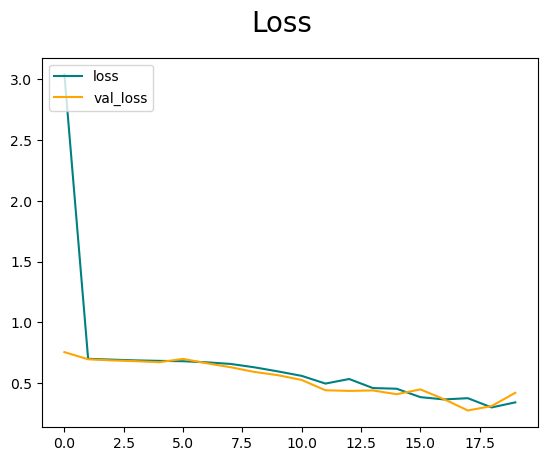

In [238]:
fig = plt.figure()
plt.plot(hist.history['loss'], color= 'teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange',label= 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

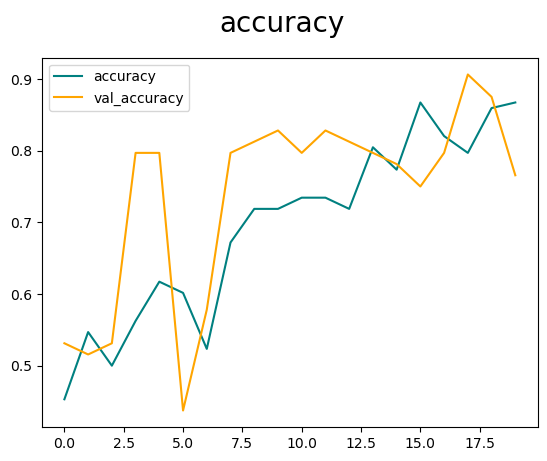

In [239]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color= 'teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange',label= 'val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

## 4.1 Evaluate

In [240]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy #classification

In [241]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [242]:
for batch in test.as_numpy_iterator():
    X,y =batch   # X - images y-true value
    yhat = model. predict(X)
    pre.update_state(y, yhat)
    re. update_state (y, yhat)
    acc.update_state(y, yhat)

2024-05-06 12:02:37.240991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2024-05-06 12:02:37.337782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:37.367296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:37.378580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:37.489174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-06 12:02:37.504262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-06 12:02:37.543025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


2024-05-06 12:02:37.783374: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [243]:
print(f'Precison:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precison:0.7368420958518982,Recall:0.9333333373069763,Accuracy:0.8125


## 4.2 Test 

In [244]:
import cv2

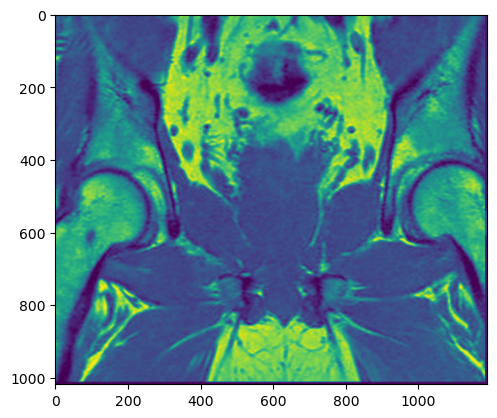

In [272]:
img = cv2.imread("test4.jpeg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)) #this statement fix the color
plt.show()

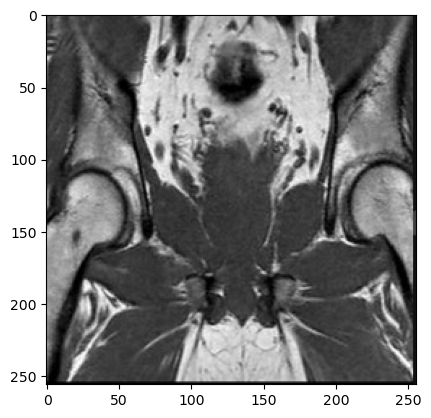

In [273]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt. show()

In [274]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [275]:
yhat

array([[0.7395412]], dtype=float32)

In [276]:
if yhat>0.50:
    print("person is not having prostrate cancer")
else:
    print("person is having prostrate cancer")

person is not having prostrate cancer


# 5. Save the Model

In [250]:
from tensorflow.keras.models import load_model

In [251]:
model.save(os.path.join('models','withwithoutmodel.h5'))

In [252]:
new_model = load_model(os.path.join('models','withwithoutmodel.h5'))

In [253]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [254]:
if yhat_new>0.50:
    print("person is not having prostrate cancer")
else:
    print("person is having prostrate cancer")

person is having prostrate cancer
